# LAB 8: Supppport Vector Machines (SVM) classification

The purpose of this lab work is to work with SVM models for classfication, with linear and non-linear kernels. 

## Tasks 
1. Study and run (cell by cell) the code below which illustrates the use of the SVM algorithm for classification. 

2. Modify the grid for tuning an SVM model, and compare the results. 

3. Apply the SVM algo to the dataset that you have in the coursework - Part 2, and experiment. 

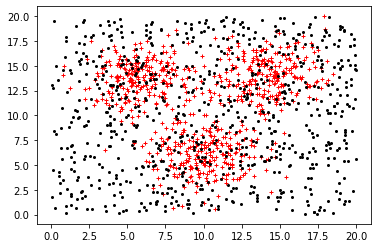

In [1]:
# Create the dataset

import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)


## Linear SVM

Linear classifiers such as support vector machine (SVM) constructs a linear separating hyperplane to distinguish instances from different classes. 
For support vector machine, the model parameters $(w^*,b^*)$ are estimated by solving the following constrained optimization problem:
\begin{eqnarray*}
&&\min_{w^*,b^*,\{\xi_i\}} \frac{\|w\|^2}{2} + \frac{1}{C} \sum_i \xi_i \\
\textrm{s.t.} && \forall i: y_i\bigg[w^T \phi(x_i) + b\bigg] \ge 1 - \xi_i, \ \ \xi_i \ge 0  
\end{eqnarray*}

## Nonlinear SVM

The code below shows an example of using nonlinear support vector machine with a Gaussian radial basis function kernel to fit the 2-dimensional dataset.

Text(0, 0.5, 'Accuracy')

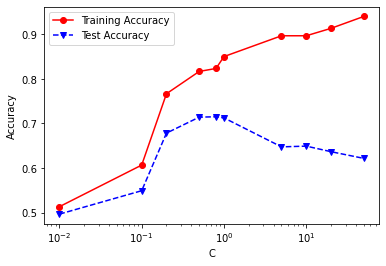

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

## Tuning SVM models

In [3]:
# SVM RBF tuning only C

from sklearn.model_selection import GridSearchCV

param_grid = [
     {'C': [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]} ]

clf = SVC(kernel='rbf',gamma='auto')

grid_search = GridSearchCV(clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                           n_jobs=-1)   # notice n_jobs is number of jobs to run in parallel; when -1, all the processor capacity is used

grid_search.fit(X_train, Y_train)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

# display performances per each repetition of cross validation
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)
    

best parameter values {'C': 0.5}
best estimator SVC(C=0.5, gamma='auto')
0.5133333333333334 {'C': 0.01}
0.5466666666666666 {'C': 0.1}
0.66 {'C': 0.2}
0.7300000000000001 {'C': 0.5}
0.72 {'C': 0.8}
0.71 {'C': 1}
0.69 {'C': 5}
0.7066666666666667 {'C': 10}
0.7 {'C': 20}
0.6666666666666667 {'C': 50}


In [4]:
from sklearn.metrics import accuracy_score

bestModel=grid_search.best_estimator_
Y_pred = bestModel.predict(X_test)
print('Accuracy on test data is %.4f' % (accuracy_score(Y_test, Y_pred)))

Accuracy on test data is 0.7142


In [5]:
# SVM RBF tuning C and gamma

from sklearn.model_selection import GridSearchCV

param_grid = [
     {'C': [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50], 'gamma':[0.01, 0.1, 0.5, 1]} ]

clf = SVC(kernel='rbf')

grid_search = GridSearchCV(clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                           n_jobs=-1)   # notice n_jobs is number of jobs to run in parallel; when -1, all the processor capacity is used

grid_search.fit(X_train, Y_train)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

# display performances per each repetition of cross validation
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

best parameter values {'C': 0.5, 'gamma': 0.01}
best estimator SVC(C=0.5, gamma=0.01)
0.5133333333333334 {'C': 0.01, 'gamma': 0.01}
0.5133333333333334 {'C': 0.01, 'gamma': 0.1}
0.5133333333333334 {'C': 0.01, 'gamma': 0.5}
0.5133333333333334 {'C': 0.01, 'gamma': 1}
0.6866666666666666 {'C': 0.1, 'gamma': 0.01}
0.7166666666666667 {'C': 0.1, 'gamma': 0.1}
0.5466666666666666 {'C': 0.1, 'gamma': 0.5}
0.5133333333333334 {'C': 0.1, 'gamma': 1}
0.7366666666666666 {'C': 0.2, 'gamma': 0.01}
0.7333333333333333 {'C': 0.2, 'gamma': 0.1}
0.66 {'C': 0.2, 'gamma': 0.5}
0.5833333333333333 {'C': 0.2, 'gamma': 1}
0.76 {'C': 0.5, 'gamma': 0.01}
0.7366666666666667 {'C': 0.5, 'gamma': 0.1}
0.7300000000000001 {'C': 0.5, 'gamma': 0.5}
0.7066666666666667 {'C': 0.5, 'gamma': 1}
0.76 {'C': 0.8, 'gamma': 0.01}
0.7266666666666666 {'C': 0.8, 'gamma': 0.1}
0.72 {'C': 0.8, 'gamma': 0.5}
0.7433333333333334 {'C': 0.8, 'gamma': 1}
0.7533333333333333 {'C': 1, 'gamma': 0.01}
0.72 {'C': 1, 'gamma': 0.1}
0.71 {'C': 1, 'gamma

In [6]:
from sklearn.metrics import accuracy_score

bestModel=grid_search.best_estimator_
Y_pred = bestModel.predict(X_test)
print('Accuracy on test data is %.4f' % (accuracy_score(Y_test, Y_pred)))

Accuracy on test data is 0.7158
